# LLM

**모델 파라미터에 따른 LLM구분**

LLM(대규모 언어 모델)은 주로 모델 파라미터(매개변수, parameters)의 개수에 따라 모델의 크기와 성능이 구분된다. 파라미터 수가 많을수록 일반적으로 더 복잡하고 다양한 언어 패턴을 학습할 수 있으며, 성능도 향상되는 경향이 있다.

* **LLM**: 175B \~ nT
* **SLM**: 6,7B ~ 30B
  * 파인튜닝후 일반화 성능이 떨어지는 경우가 많다.
  * 특히 10B 밑의 모델들이 더 그렇다*
* **On-device AI**: 1~2B

**open/close-source 여부에 따른 LLM구분**

LLM은 공개 범위와 활용 방식에 따라 크게 **개방형(Open Source, 오픈소스)**과 **폐쇄형(Closed Source, 독점/상용)**으로 구분할 수 있다.

| 구분      | 개방형(Open Source) LLM              | 폐쇄형(Closed Source) LLM                 |
|:-----------|--------------------------------------|-------------------------------------------|
| 라이선스   | 오픈소스 라이선스(예: Apache, MIT)    | 벤더(기업) 라이선스, 상용, API 기반         |
| 모델 접근  | 소스 코드, 가중치, 아키텍처 모두 공개 | 내부 구조/가중치 비공개, API로만 접근        |
| 커스터마이징 | 자유롭게 수정·파인튜닝 가능           | 제한적, 벤더가 허용하는 범위 내에서만 가능   |
| 기술 지원 | 커뮤니티 중심, 자발적 기여            | 벤더의 공식 지원, SLA 제공                  |
| 보안/프라이버시 | 자체 서버 배포 가능, 유연한 보안 적용  | 벤더 인프라 의존, 데이터 외부 전송 필요       |
| 비용 구조  | 인프라 직접 부담, 무료 활용 가능       | API 호출별 과금, 구독 등 상용 모델           |
| 대표 예시  | Meta LLaMA, Mistral, GPT-NeoX 등     | OpenAI GPT-3/4, Google Gemini, Anthropic Claude 등 |

- **개방형 LLM**은 연구자와 개발자가 자유롭게 모델을 활용·수정할 수 있어 빠른 혁신과 다양한 커스터마이징이 가능하다. 단, 자체 운영·관리 역량이 필요하다.
- **폐쇄형 LLM**은 벤더가 모델을 소유·운영하며, 사용자는 API 형태로 접근한다. 보안, 신뢰성, 공식 지원이 강점이나, 내부 구조나 가중치 접근이 제한된다.

## LLM Vendor별 테스트

1. **번역** :

   ```text
   """
      The dominant sequence transduction models are based on complex recurrent or
   convolutional neural networks that include an encoder and a decoder. The best
   performing models also connect the encoder and decoder through an attention
   mechanism. We propose a new simple network architecture, the Transformer,
   based solely on attention mechanisms, dispensing with recurrence and convolutions
   entirely. Experiments on two machine translation tasks show these models to
   be superior in quality while being more parallelizable and requiring significantly
   less time to train. Our model achieves 28.4 BLEU on the WMT 2014 Englishto-German translation task, improving over the existing best results, including
   ensembles, by over 2 BLEU. On the WMT 2014 English-to-French translation task,
   our model establishes a new single-model state-of-the-art BLEU score of 41.8 after
   training for 3.5 days on eight GPUs, a small fraction of the training costs of the
   best models from the literature. We show that the Transformer generalizes well to
   other tasks by applying it successfully to English constituency parsing both with
   large and limited training data.
   """

   영어로 작성된 과학 저널 논문 초록을 한국어로 번역하되, 전문 용어(예: “photovoltaic efficiency”, “bandgap engineering”)를 정확하게 반영하고, 논문 특유의 딱딱한 문체를 유지하라.
   ```
   - [Deep Residual Learning for Image Recognition](https://arxiv.org/pdf/1512.03385)
   - [Attention Is All You Need](https://arxiv.org/pdf/1706.03762)

2. **코드 생성 (난이도 중상)**

   ```text
   최근 비트코인 가격데이터를 가져와서 시각화 하는 코드를 작성해줘.
   - 설치가 필요한 라이브러리가 있는 경우, 설치코드 역시 작성할 것!
   ```

3. **창의적 글짓기**

   ```text
   “인간과 로봇이 공존하는 미래 도시”를 배경으로,
   200자 내외의 짧은 SF 단편을 한 편 써줘.
   ```

4. **요약**

   ```text
   아래 기술 블로그 글을 3문장 이내로 간결하게 요약해줘:
   “머신러닝 모델의 과적합(overfitting) 문제를 해결하기 위해 정규화(regularization) 기법이 어떻게 사용되는지, L1/L2 페널티의 차이와 장단점을 사례를 들어 설명한다.”
   ```
5. **환각**

   ```text
   현재 대한민국 대통령이 누구야?
   강남에 유명한 성형외과 의사 오지명에 대해 알려줘
   ```
   - knowledge cutoff 이후 이벤트에 대한 질문

### Gooe Gemini 코드 생성 테스트

In [1]:
!pip install requests pandas matplotlib

--- 비트코인 가격 데이터 (최근 5개) ---
                             price
date                              
2025-06-21 00:00:00  103290.105145
2025-06-22 00:00:00  101532.568385
2025-06-23 00:00:00  100852.582646
2025-06-24 00:00:00  105511.624379
2025-06-24 02:48:52  105029.233594


/tmp/ipython-input-2-2969388701.py:68: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 그래프 요소들이 겹치지 않도록 조정
/tmp/ipython-input-2-2969388701.py:68: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 그래프 요소들이 겹치지 않도록 조정
/tmp/ipython-input-2-2969388701.py:68: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 그래프 요소들이 겹치지 않도록 조정
/tmp/ipython-input-2-2969388701.py:68: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 그래프 요소들이 겹치지 않도록 조정
/tmp/ipython-input-2-2969388701.py:68: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 그래프 요소들이 겹치지 않도록 조정
/tmp/ipython-input-2-2969388701.py:68: UserWarning: Glyph 44540 (\N{HANGUL SYLLABLE GEUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 그래프 요소들이 겹치지 않도록

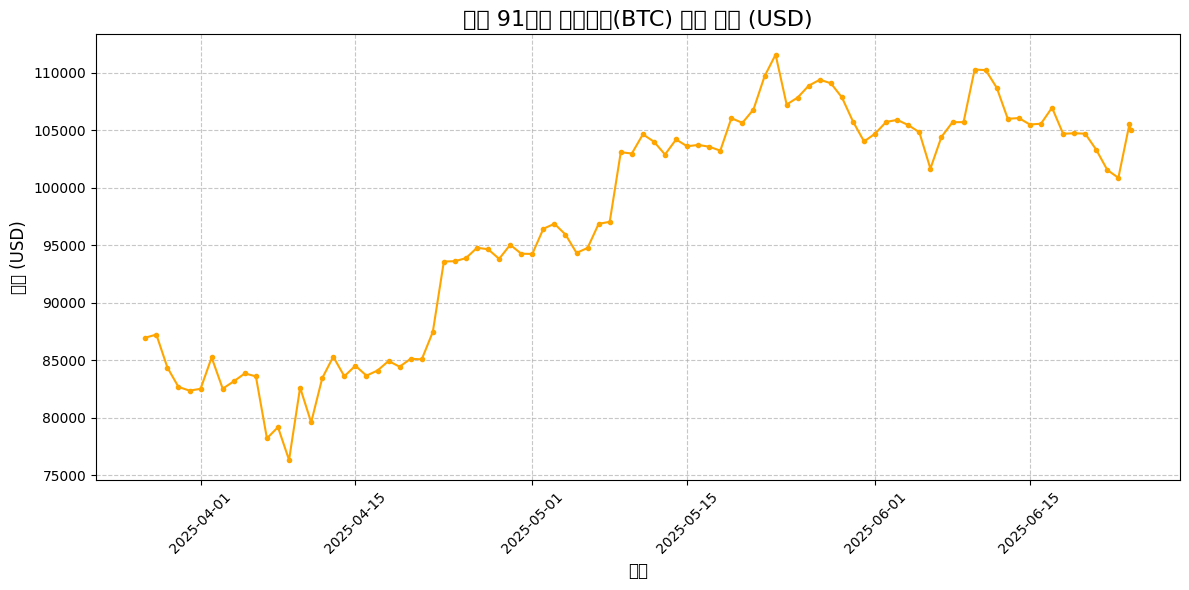

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def get_bitcoin_price_data(days=30):
    """
    CoinGecko API를 사용하여 최근 비트코인 가격 데이터를 가져옵니다.

    Args:
        days (int): 가져올 과거 일수 (기본값: 30일).

    Returns:
        pandas.DataFrame: 날짜와 비트코인 가격을 포함하는 데이터프레임.
    """
    # CoinGecko API의 비트코인 일일 가격 데이터 엔드포인트
    # 'vs_currency'는 USD (미국 달러)로 설정하고, 'days'는 가져올 일수를 나타냅니다.
    # 'interval'은 'daily'로 설정하여 일별 데이터를 가져옵니다.
    url = f"https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days={days}&interval=daily"

    try:
        response = requests.get(url)
        response.raise_for_status()  # HTTP 오류가 발생하면 예외 발생
        data = response.json()

        # 'prices' 키 아래에 타임스탬프와 가격 데이터가 있습니다.
        prices = data.get('prices', [])

        if not prices:
            print("데이터를 가져오지 못했습니다. API 응답을 확인하세요.")
            return pd.DataFrame()

        # 데이터프레임 생성
        # 타임스탬프는 밀리초 단위이므로 1000으로 나누어 초 단위로 변환 후 datetime 객체로 변환
        df = pd.DataFrame(prices, columns=['timestamp', 'price'])
        df['date'] = pd.to_datetime(df['timestamp'], unit='ms')
        df['price'] = df['price'].astype(float) # 가격을 float 타입으로 변환

        # 필요한 컬럼만 선택하고, 날짜를 인덱스로 설정
        df = df[['date', 'price']].set_index('date')
        return df

    except requests.exceptions.RequestException as e:
        print(f"API 요청 중 오류가 발생했습니다: {e}")
        return pd.DataFrame()
    except ValueError as e:
        print(f"JSON 파싱 또는 데이터 변환 중 오류가 발생했습니다: {e}")
        return pd.DataFrame()

def plot_bitcoin_price(df):
    """
    비트코인 가격 데이터를 시각화합니다.

    Args:
        df (pandas.DataFrame): 날짜와 비트코인 가격을 포함하는 데이터프레임.
    """
    if df.empty:
        print("시각화할 데이터가 없습니다.")
        return

    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['price'], color='orange', linestyle='-', marker='o', markersize=3)
    plt.title(f'최근 {len(df)}일간 비트코인(BTC) 가격 추이 (USD)', fontsize=16)
    plt.xlabel('날짜', fontsize=12)
    plt.ylabel('가격 (USD)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(rotation=45) # x축 레이블 회전
    plt.tight_layout() # 그래프 요소들이 겹치지 않도록 조정
    plt.show()

if __name__ == "__main__":
    # 최근 90일간의 비트코인 가격 데이터를 가져옵니다.
    bitcoin_data = get_bitcoin_price_data(days=90)

    if not bitcoin_data.empty:
        print("--- 비트코인 가격 데이터 (최근 5개) ---")
        print(bitcoin_data.tail())
        plot_bitcoin_price(bitcoin_data)
    else:
        print("비트코인 가격 데이터를 가져오는 데 실패했습니다.")